<p style="text-align:center;">📊 التقرير التقني: تحليل بيانات درجات الحرارة والتنبؤ المستقبلي</p>
<p style="text-align:center;">الموجه إلى: قسم الأبحاث المناخية</p>
<p style="text-align:center;">إعداد: [عادل القبلي - أحمد المظفري]</p>
<p style="text-align:center;">التاريخ: [2025-02-27]</p>
<p style="text-align:center;">🔹 المقدمة</p>
<p style="text-align:center;">📌 وصف المشروع</p>
يهدف هذا التقرير إلى تحليل بيانات درجات الحرارة العالمية وتقديم توقعات مستقبلية حتى عام 2040 باستخدام نماذج تحليل السلاسل الزمنية. سيتم التركيز بشكل خاص على بيانات اليمن، مع مقارنة المناخ في الدول المجاورة، مثل السعودية، عمان، الإمارات، وإثيوبيا. كما سيتم تطوير واجهة رسومية تفاعلية لتمكين استكشاف البيانات والتنبؤات بسهولة.

<p style="text-align:center;">📊 نظرة عامة على البيانات</p>
📂 مصدر البيانات: ملف يحتوي على معلومات درجات الحرارة التاريخية لـ 242 دولة حول العالم، مقاسة على مدى عقود.
📏 حجم البيانات: تحتوي البيانات على 576,698 سجلًا مع 4 متغيرات رئيسية، تشمل:
dt – التاريخ
AverageTemperature – متوسط درجة الحرارة (°C)
AverageTemperatureUncertainty – هامش الخطأ
Country – اسم الدولة


تحميل البيانات 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX




df = pd.read_csv("cleaned_data.csv")

# حساب الإحصائيات العامة لكل دولة

In [7]:
country_stats = df.groupby("Country")["AverageTemperature"].agg(["mean", "median", "max", "min", "std"]).reset_index()

# أعلى 10 دول حرارة

In [8]:
top_10_hottest = country_stats.nlargest(10, "mean")

# أدنى 10 دول حرارة

In [9]:
top_10_coldest = country_stats.nsmallest(10, "mean")

# إنشاء مخطط شريطي لأعلى وأدنى 10 دول حرارة

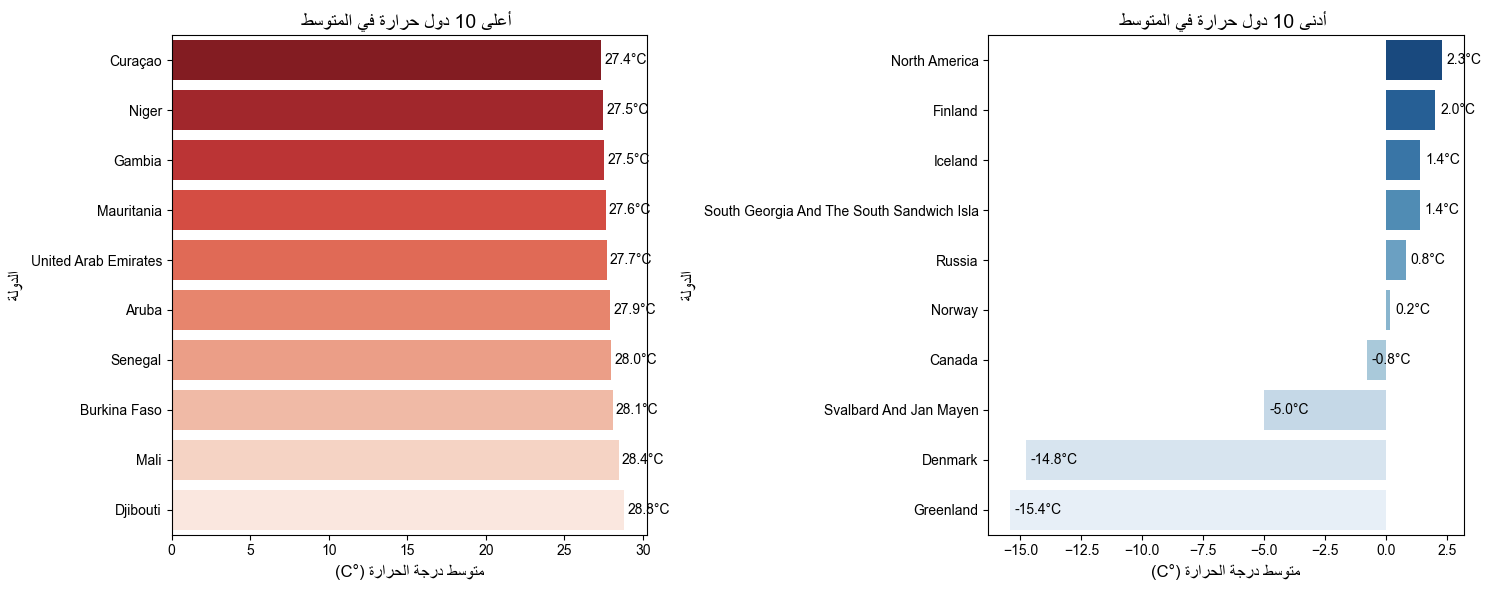

In [21]:
#  تحديد الخط العربي الصحيح
plt.rcParams['font.family'] = 'Arial'  # جرّب أيضاً 'Cairo' أو 'Tahoma'

#  تحويل النصوص العربية لجعلها تظهر بشكل صحيح
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)  # إصلاح ترتيب الأحرف
    bidi_text = get_display(reshaped_text)  # جعل النص يقرأ بشكل صحيح
    return bidi_text

# حساب الإحصائيات العامة لكل دولة
country_stats = df.groupby("Country")["AverageTemperature"].agg(["mean", "median", "max", "min", "std"]).reset_index()

# إصلاح أسماء الدول العربية حتى لا تظهر بشكل متقطع
country_stats["Country"] = country_stats["Country"].apply(fix_arabic_text)

# أعلى 10 دول حرارة
top_10_hottest = country_stats.nlargest(10, "mean")

# أدنى 10 دول حرارة
top_10_coldest = country_stats.nsmallest(10, "mean")

# إنشاء مخطط شريطي لأعلى وأدنى 10 دول حرارة
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#  مخطط أعلى 10 دول حرارة
sns.barplot(x="mean", y="Country", hue="Country", data=top_10_hottest, palette="Reds", ax=ax[0], legend=False)
ax[0].set_title(fix_arabic_text(" أعلى 10 دول حرارة في المتوسط"), fontsize=14)
ax[0].set_xlabel(fix_arabic_text("متوسط درجة الحرارة (°C)"), fontsize=12)
ax[0].set_ylabel(fix_arabic_text("الدولة"), fontsize=12)
ax[0].invert_yaxis()  # لجعل النص يظهر من اليمين لليسار

# إضافة القيم على الأشرطة
for i, v in enumerate(top_10_hottest["mean"]):
    ax[0].text(v + 0.2, i, f"{v:.1f}°C", color="black", fontsize=10, va="center")

# 🔵 مخطط أدنى 10 دول حرارة
sns.barplot(x="mean", y="Country", hue="Country", data=top_10_coldest, palette="Blues", ax=ax[1], legend=False)
ax[1].set_title(fix_arabic_text(" أدنى 10 دول حرارة في المتوسط"), fontsize=14)
ax[1].set_xlabel(fix_arabic_text("متوسط درجة الحرارة (°C)"), fontsize=12)
ax[1].set_ylabel(fix_arabic_text("الدولة"), fontsize=12)
ax[1].invert_yaxis()  # لجعل النص يظهر من اليمين لليسار

# إضافة القيم على الأشرطة
for i, v in enumerate(top_10_coldest["mean"]):
    ax[1].text(v + 0.2, i, f"{v:.1f}°C", color="black", fontsize=10, va="center")

plt.tight_layout()
plt.show()

نتائج تحليل توزيع درجات الحرارة عالميًا

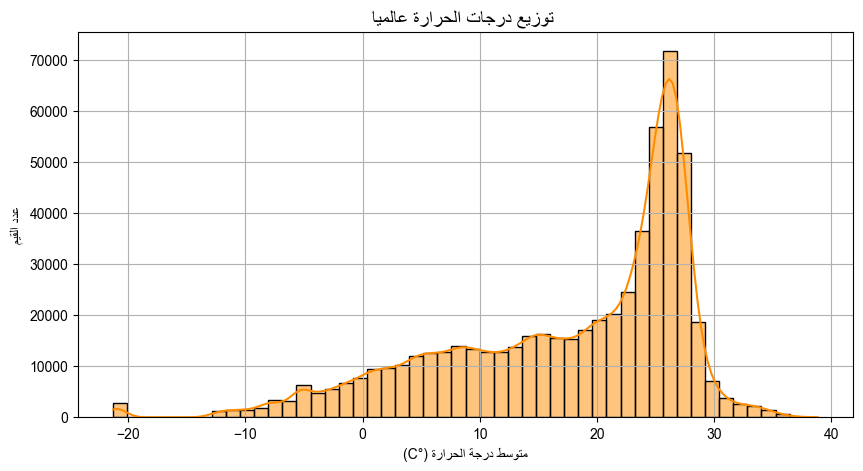

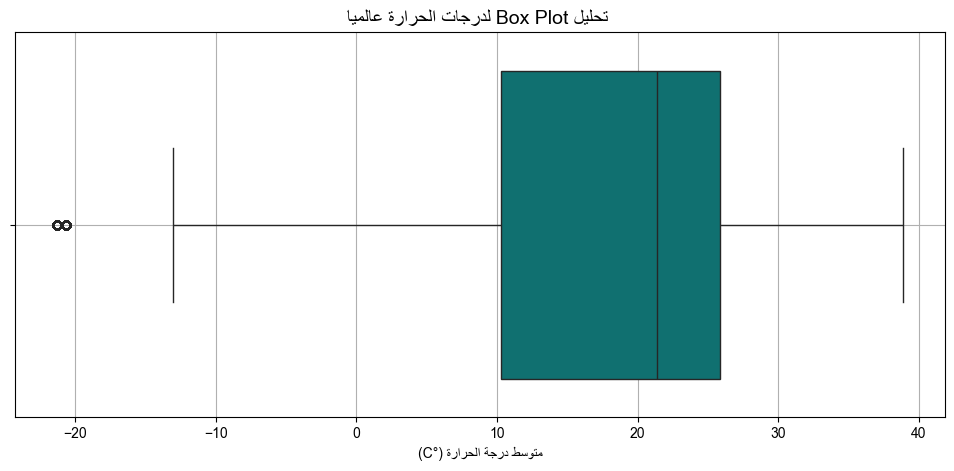

In [19]:
#  تحديد الخط العربي الصحيح
plt.rcParams['font.family'] = 'Arial'  # يمكنك تجربة 'Cairo' أو 'Tahoma' أيضًا

#  تحويل النصوص العربية لإصلاح ترتيب الأحرف
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)  # إصلاح ترتيب الأحرف
    bidi_text = get_display(reshaped_text)  # جعل النص يقرأ بشكل صحيح
    return bidi_text

#  إنشاء هيستوغرام لتوزيع درجات الحرارة عالميًا
plt.figure(figsize=(10, 5))
sns.histplot(df["AverageTemperature"], bins=50, kde=True, color="darkorange")
plt.title(fix_arabic_text(" توزيع درجات الحرارة عالميًا"), fontsize=14)
plt.xlabel(fix_arabic_text("متوسط درجة الحرارة (°C)"))
plt.ylabel(fix_arabic_text("عدد القيم"))
plt.grid(True)
plt.show()

#  إنشاء Box Plot لتوزيع درجات الحرارة عالميًا
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["AverageTemperature"], color="teal")
plt.title(fix_arabic_text(" تحليل Box Plot لدرجات الحرارة عالميًا"), fontsize=14)
plt.xlabel(fix_arabic_text("متوسط درجة الحرارة (°C)"))
plt.grid(True)
plt.show()


تحليل تغير درجات الحرارة في اليمن عبر السنوات

C:\Users\Adel\AppData\Local\Temp\ipykernel_11028\2319004506.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yemen_df["dt"] = pd.to_datetime(yemen_df["dt"])


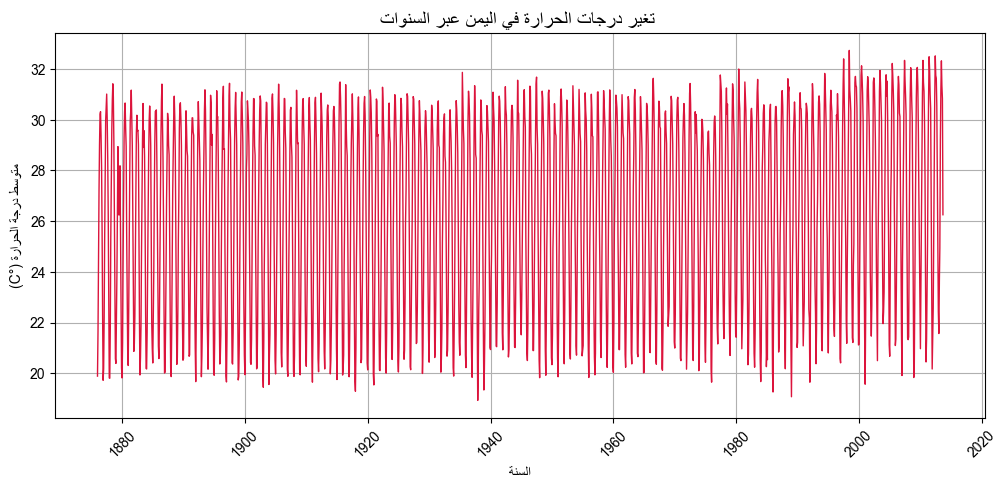

In [22]:
#  تحديد الخط العربي الصحيح
plt.rcParams['font.family'] = 'Arial'  # يمكنك تجربة 'Cairo' أو 'Tahoma'

#  تحويل النصوص العربية لإصلاح ترتيب الأحرف
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)  # إصلاح ترتيب الأحرف
    bidi_text = get_display(reshaped_text)  # جعل النص يقرأ بشكل صحيح
    return bidi_text

#  تصفية البيانات الخاصة باليمن
yemen_df = df[df["Country"] == "Yemen"]

#  تحويل العمود 'dt' إلى نوع تاريخي (في حال لم يكن كذلك)
yemen_df["dt"] = pd.to_datetime(yemen_df["dt"])

#  رسم المخطط الزمني لدرجات الحرارة في اليمن
plt.figure(figsize=(12, 5))
plt.plot(yemen_df["dt"], yemen_df["AverageTemperature"], color="crimson", linewidth=1)
plt.title(fix_arabic_text(" تغير درجات الحرارة في اليمن عبر السنوات"), fontsize=14)
plt.xlabel(fix_arabic_text("السنة"))
plt.ylabel(fix_arabic_text("متوسط درجة الحرارة (°C)"))
plt.grid(True)

# 🔹 ضبط تنسيق التواريخ على المحور الأفقي
plt.xticks(rotation=45)  # تدوير التواريخ لتحسين القراءة

plt.show()

In [ ]:
مقارنة درجات الحرارة بين اليمن والدول المجاورة

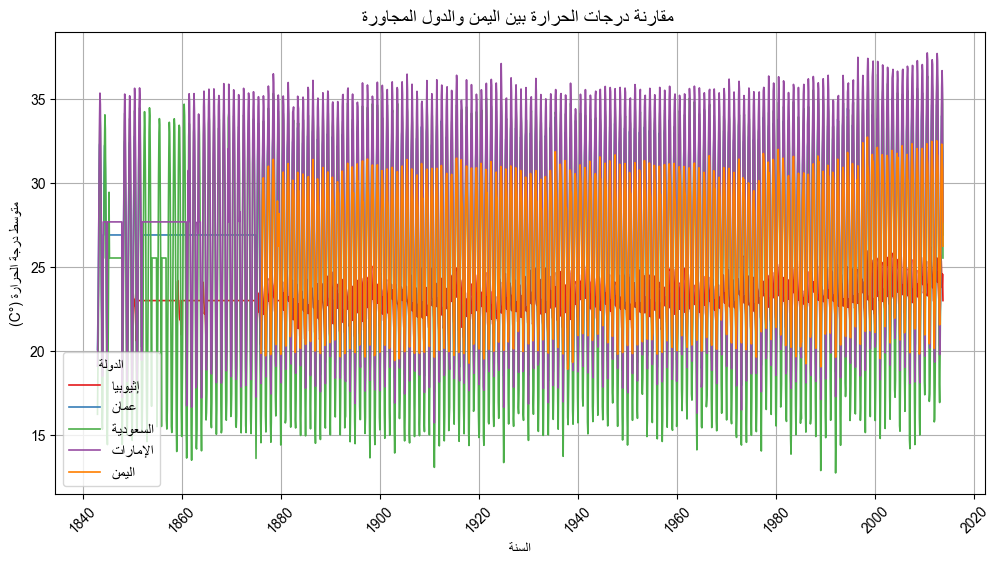

In [23]:
#  تحديد الخط العربي الصحيح
plt.rcParams['font.family'] = 'Arial'  # يمكنك تجربة 'Cairo' أو 'Tahoma'

#  تحويل النصوص العربية لإصلاح ترتيب الأحرف
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)  # إصلاح ترتيب الأحرف
    bidi_text = get_display(reshaped_text)  # جعل النص يقرأ بشكل صحيح
    return bidi_text

# 🔹 تحديد الدول المجاورة
neighboring_countries = {
    "Saudi Arabia": "السعودية",
    "Oman": "عمان",
    "United Arab Emirates": "الإمارات",
    "Ethiopia": "إثيوبيا",
    "Yemen": "اليمن"
}

#  تصفية البيانات للدول المجاورة
neighbors_df = df[df["Country"].isin(neighboring_countries.keys())].copy()

#  تحويل أسماء الدول إلى العربية لضمان عدم تقطع النصوص
neighbors_df["Country"] = neighbors_df["Country"].map(lambda x: fix_arabic_text(neighboring_countries[x]))

#  تحويل العمود 'dt' إلى نوع تاريخي (في حال لم يكن كذلك)
neighbors_df["dt"] = pd.to_datetime(neighbors_df["dt"])

#  رسم المخطط الزمني للمقارنة بين الدول المجاورة
plt.figure(figsize=(12, 6))
sns.lineplot(data=neighbors_df, x="dt", y="AverageTemperature", hue="Country", linewidth=1.2, palette="Set1")

plt.title(fix_arabic_text(" مقارنة درجات الحرارة بين اليمن والدول المجاورة"), fontsize=14)
plt.xlabel(fix_arabic_text("السنة"))
plt.ylabel(fix_arabic_text("متوسط درجة الحرارة (°C)"))

#  تعديل وسيلة الإيضاح (Legend)
plt.legend(title=fix_arabic_text("الدولة"), fontsize=11)

#  ضبط تنسيق التواريخ على المحور الأفقي
plt.xticks(rotation=45)  # تدوير التواريخ لتحسين القراءة
plt.grid(True)

plt.show()


تحليل التغيرات الموسمية في درجات الحرارة في اليمن

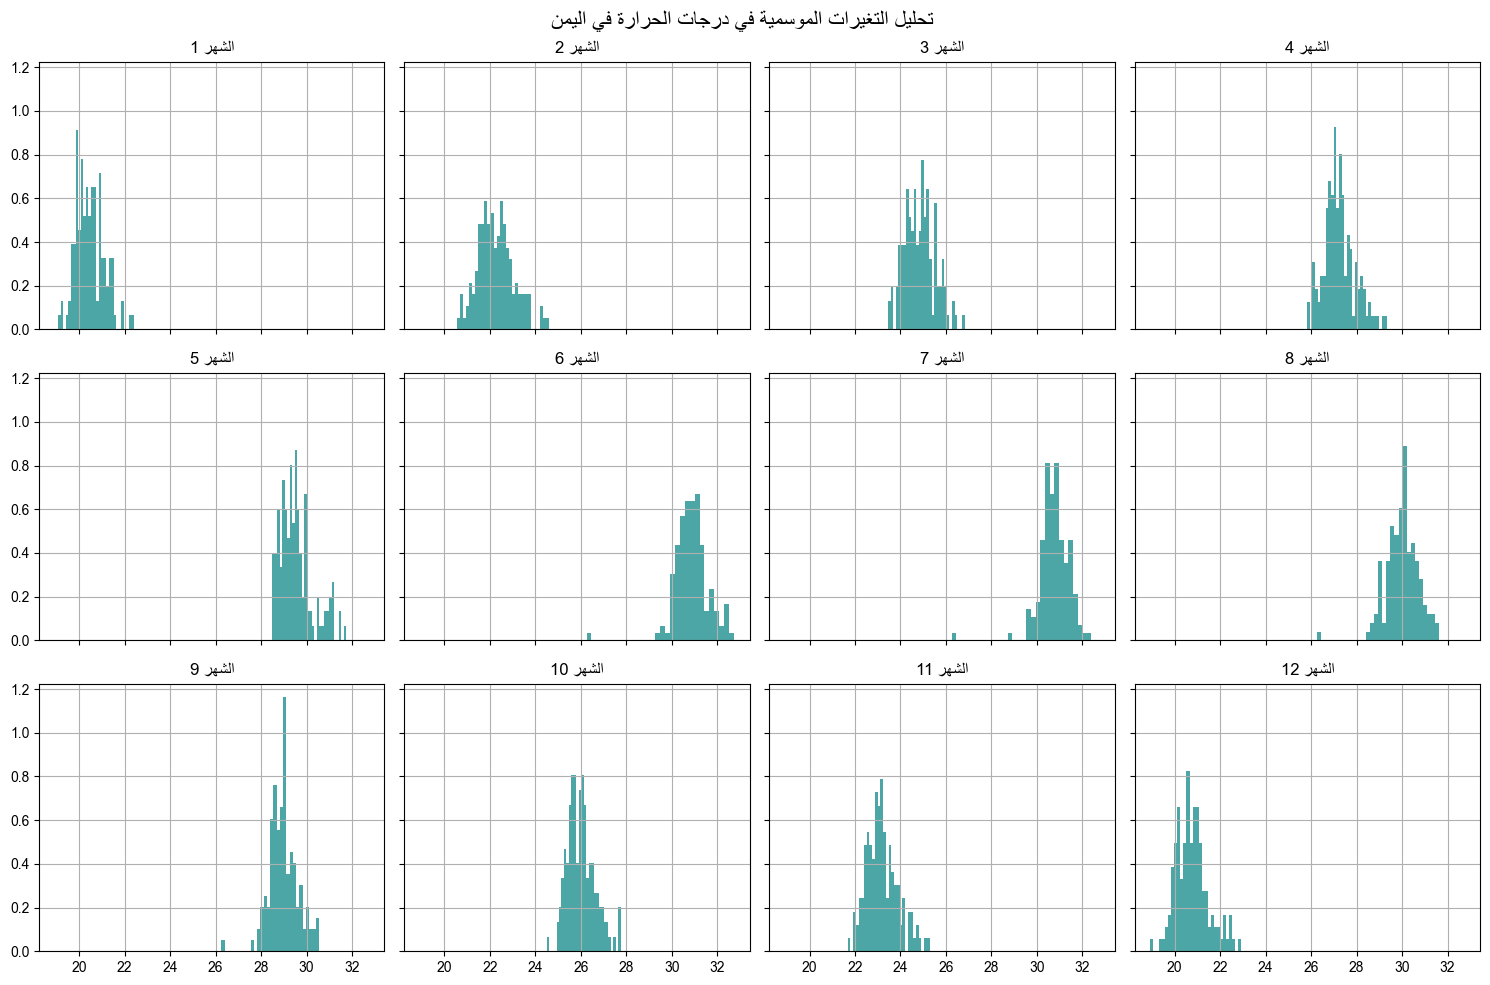

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display

#  تحديد الخط العربي الصحيح
plt.rcParams['font.family'] = 'Arial'  # يمكنك تجربة 'Cairo' أو 'Tahoma'

#  تحويل النصوص العربية لإصلاح ترتيب الأحرف
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)  # إصلاح ترتيب الأحرف
    bidi_text = get_display(reshaped_text)  # جعل النص يقرأ بشكل صحيح
    return bidi_text

# 🔹 تصفية البيانات الخاصة باليمن
yemen_df = df[df["Country"] == "Yemen"].copy()

# 🔹 التأكد من أن 'dt' هو تاريخ
yemen_df["dt"] = pd.to_datetime(yemen_df["dt"])

# 🔹 استخراج الشهر من 'dt' وإضافته كعمود جديد
yemen_df["Month"] = yemen_df["dt"].dt.month

#  إنشاء مخططات منفصلة لكل شهر
fig, axes = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

# 🔹 رسم مخطط كثافة لكل شهر
for i, month in enumerate(range(1, 13)):
    subset = yemen_df[yemen_df["Month"] == month]
    axes[i].hist(subset["AverageTemperature"], bins=30, color="teal", alpha=0.7, density=True)
    axes[i].set_title(fix_arabic_text(f"الشهر {month}"))  # إصلاح اللغة العربية
    axes[i].grid(True)

# 🔹 تحسين تخطيط الشكل
plt.suptitle(fix_arabic_text(" تحليل التغيرات الموسمية في درجات الحرارة في اليمن"), fontsize=16)
plt.tight_layout()
plt.show()


نلاحظ أن هناك اختلافات واضحة بين الأشهر، حيث تكون درجات الحرارة مرتفعة في الصيف ومنخفضة في الشتاء.

تحليل ACF و PACF لتحديد معلمات نموذج ARIMA

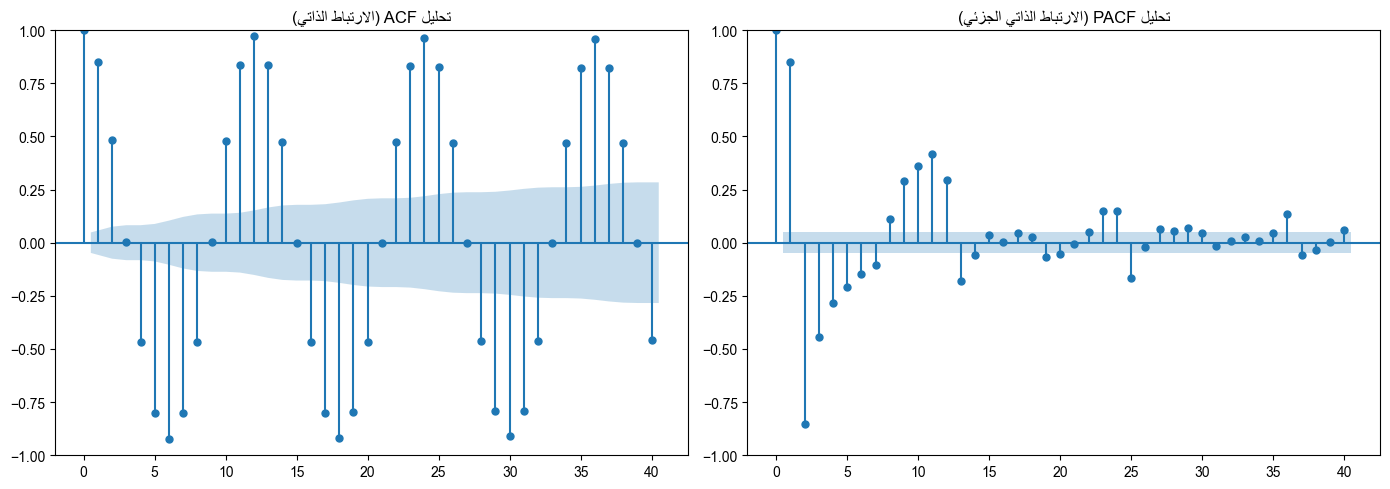

In [28]:
#  تحديد الخط العربي الصحيح
plt.rcParams['font.family'] = 'Arial'

#  تحويل النصوص العربية لإصلاح ترتيب الأحرف
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# 🔹 إعداد بيانات السلسلة الزمنية لليمن
yemen_ts = yemen_df.set_index("dt")["AverageTemperature"].dropna()

#  رسم تحليل ACF و PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(yemen_ts, ax=axes[0], lags=40)
axes[0].set_title(fix_arabic_text("تحليل ACF (الارتباط الذاتي)"))

plot_pacf(yemen_ts, ax=axes[1], lags=40)
axes[1].set_title(fix_arabic_text("تحليل PACF (الارتباط الذاتي الجزئي)"))

plt.tight_layout()
plt.show()


نتائج تدريب نموذج ARIMA (1,1,1) على بيانات اليمن

In [33]:
# 🔹 التأكد من أن 'dt' هو `DatetimeIndex` وضبط `freq`
yemen_df["dt"] = pd.to_datetime(yemen_df["dt"])
yemen_ts = yemen_df.set_index("dt")["AverageTemperature"].dropna()
yemen_ts = yemen_ts.asfreq("MS")  # ضبط التردد الشهري

# 🔹 التحقق من استقرارية السلسلة الزمنية باستخدام الفروق (Differencing)
yemen_ts_diff = yemen_ts.diff().dropna()

#  تدريب نموذج ARIMA بقيم (p=1, d=1, q=1)
arima_model = ARIMA(yemen_ts, order=(1, 1, 1))
arima_fit = arima_model.fit()

# 🔹 عرض ملخص النموذج
print(arima_fit.summary())


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                 1653
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2910.472
Date:                Fri, 28 Feb 2025   AIC                           5826.944
Time:                        00:29:29   BIC                           5843.174
Sample:                    01-01-1876   HQIC                          5832.961
                         - 09-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6394      0.028     22.849      0.000       0.585       0.694
ma.L1          0.1916      0.033      5.873      0.000       0.128       0.256
sigma2         1.9842      0.067     29.690      0.0

 تحليل بقايا نموذج ARIMA

C:\Users\Adel\AppData\Local\Temp\ipykernel_11028\3364210176.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\Adel\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


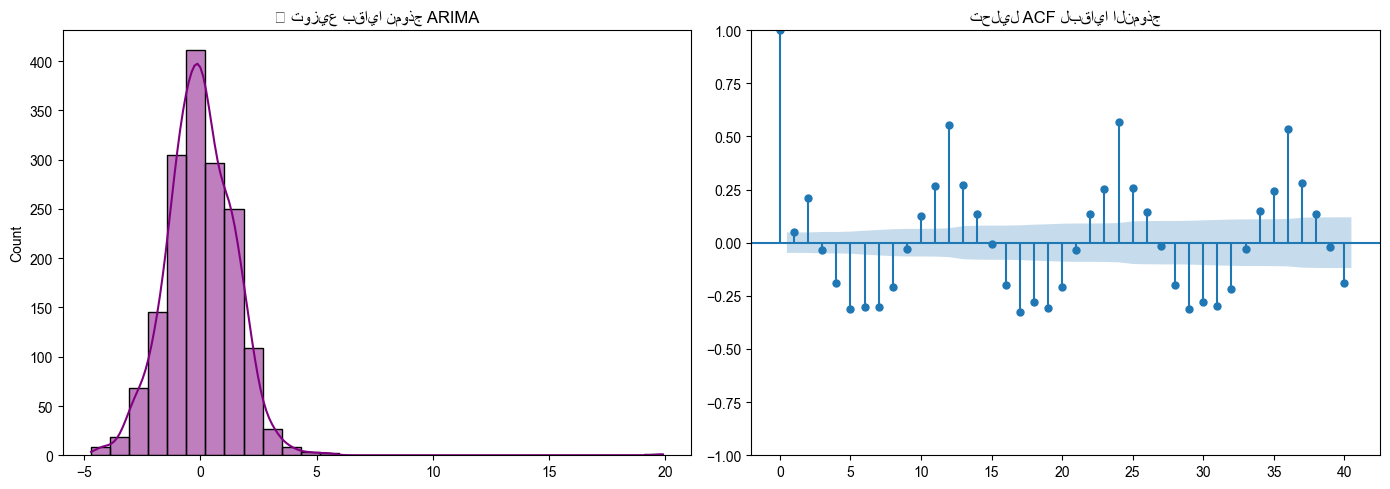

In [34]:
# استخراج البقايا من النموذج
residuals = arima_fit.resid

# رسم تحليل البقايا
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# رسم التوزيع الطبيعي للبقايا
sns.histplot(residuals, bins=30, kde=True, color="purple", ax=axes[0])
axes[0].set_title("📊 توزيع بقايا نموذج ARIMA")

# رسم ACF للبقايا
plot_acf(residuals, ax=axes[1], lags=40, title="تحليل ACF لبقايا النموذج")

plt.tight_layout()
plt.show()


 نتائج التنبؤ باستخدام ARIMA حتى عام 2050


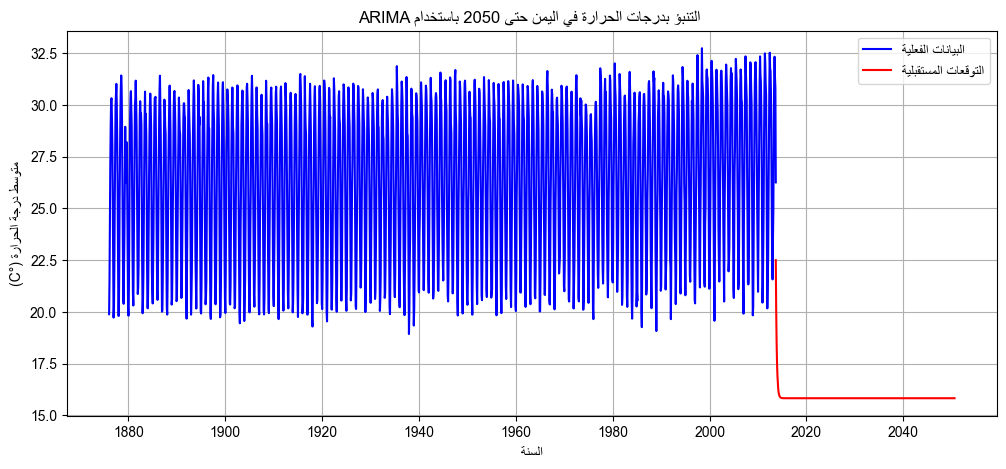

In [36]:
#  تحديد الخط العربي الصحيح
plt.rcParams['font.family'] = 'Arial'

#  تحويل النصوص العربية لإصلاح ترتيب الأحرف
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

#  إعداد بيانات السلسلة الزمنية لليمن
yemen_df["dt"] = pd.to_datetime(yemen_df["dt"])
yemen_ts = yemen_df.set_index("dt")["AverageTemperature"].dropna().asfreq("MS")

#  تدريب نموذج ARIMA
arima_model = ARIMA(yemen_ts, order=(1, 1, 1))
arima_fit = arima_model.fit()

#  توقع القيم المستقبلية حتى عام 2050
n_steps = (2050 - yemen_ts.index[-1].year) * 12  # عدد الأشهر حتى 2050
forecast_mean = arima_fit.forecast(steps=n_steps)

#  إنشاء الفهرس الزمني للتوقعات
forecast_index = pd.date_range(start=yemen_ts.index[-1], periods=n_steps, freq="MS")

#  رسم التوقعات بدون فترات الثقة
plt.figure(figsize=(12, 5))
plt.plot(yemen_ts, label=fix_arabic_text("البيانات الفعلية"), color="blue")
plt.plot(forecast_index, forecast_mean, label=fix_arabic_text("التوقعات المستقبلية"), color="red")

plt.title(fix_arabic_text(" التنبؤ بدرجات الحرارة في اليمن حتى 2050 باستخدام ARIMA"))
plt.xlabel(fix_arabic_text("السنة"))
plt.ylabel(fix_arabic_text("متوسط درجة الحرارة (°C)"))
plt.legend()
plt.grid(True)
plt.show()


تحليل ACF و PACF للفروق الموسمية

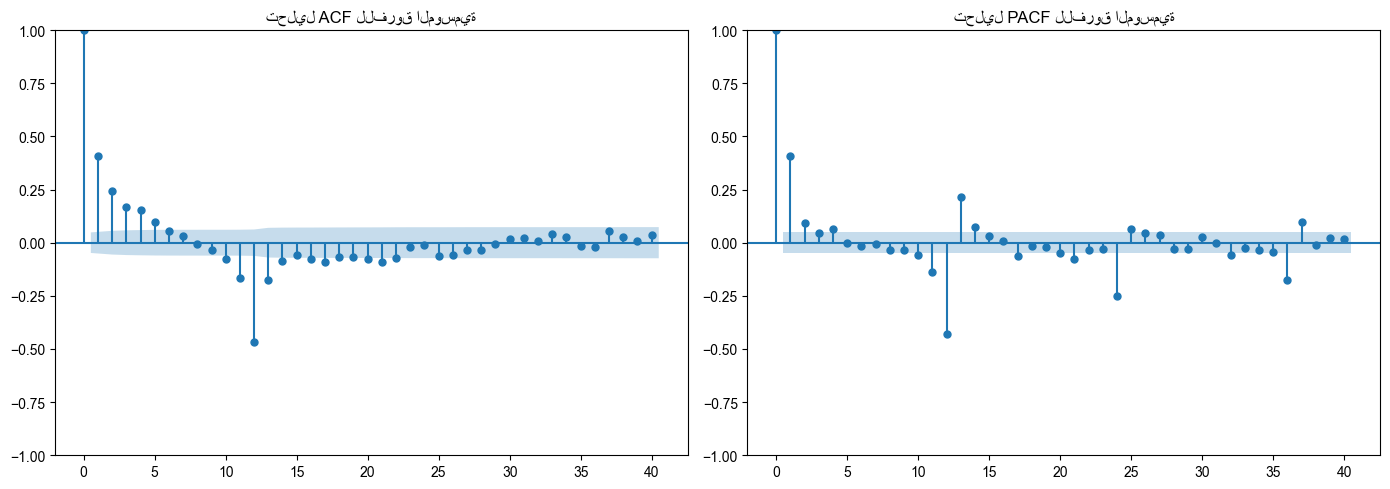

In [38]:
# رسم تحليل ACF و PACF مرة أخرى للتحقق من التأثيرات الموسمية
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(yemen_ts.diff(12).dropna(), ax=axes[0], lags=40, title="تحليل ACF للفروق الموسمية")
plot_pacf(yemen_ts.diff(12).dropna(), ax=axes[1], lags=40, title="تحليل PACF للفروق الموسمية")

plt.tight_layout()
plt.show()


 نتائج التنبؤ باستخدام SARIMA حتى عام 2050

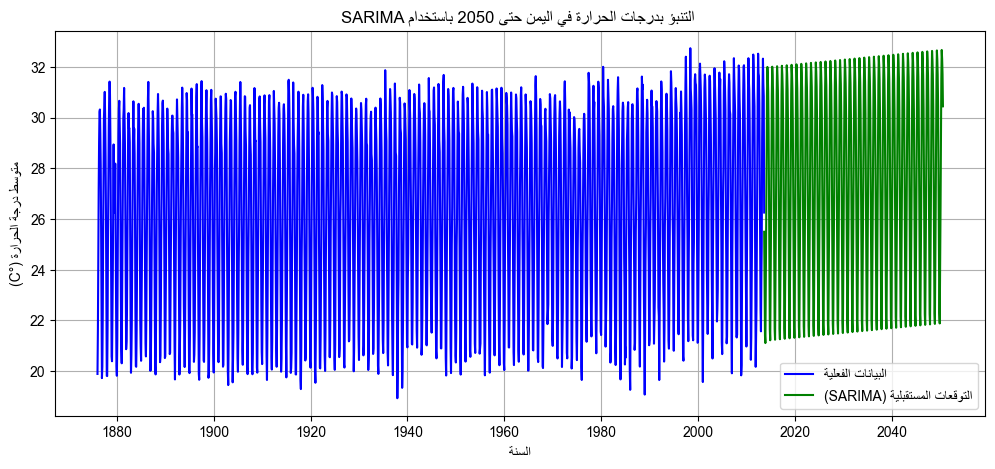

In [40]:
#  تحديد الخط العربي الصحيح
plt.rcParams['font.family'] = 'Arial'

#  تحويل النصوص العربية لإصلاح ترتيب الأحرف
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

#  إعداد بيانات السلسلة الزمنية لليمن
yemen_df["dt"] = pd.to_datetime(yemen_df["dt"])
yemen_ts = yemen_df.set_index("dt")["AverageTemperature"].dropna().asfreq("MS")

# تدريب نموذج SARIMA
sarima_model = SARIMAX(yemen_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

#  توقع القيم المستقبلية حتى عام 2050
n_steps = (2050 - yemen_ts.index[-1].year) * 12  # عدد الأشهر حتى 2050
sarima_forecast_mean = sarima_fit.forecast(steps=n_steps)

#  إنشاء الفهرس الزمني للتوقعات
sarima_forecast_index = pd.date_range(start=yemen_ts.index[-1], periods=n_steps, freq="MS")

#  رسم التوقعات المستقبلية بدون فترات الثقة
plt.figure(figsize=(12, 5))
plt.plot(yemen_ts, label=fix_arabic_text("البيانات الفعلية"), color="blue")
plt.plot(sarima_forecast_index, sarima_forecast_mean, label=fix_arabic_text("التوقعات المستقبلية (SARIMA)"), color="green")

plt.title(fix_arabic_text(" التنبؤ بدرجات الحرارة في اليمن حتى 2050 باستخدام SARIMA"))
plt.xlabel(fix_arabic_text("السنة"))
plt.ylabel(fix_arabic_text("متوسط درجة الحرارة (°C)"))
plt.legend()
plt.grid(True)
plt.show()


مقارنة توقعات ARIMA و SARIMA لدرجات الحرارة في اليمن حتى 2050

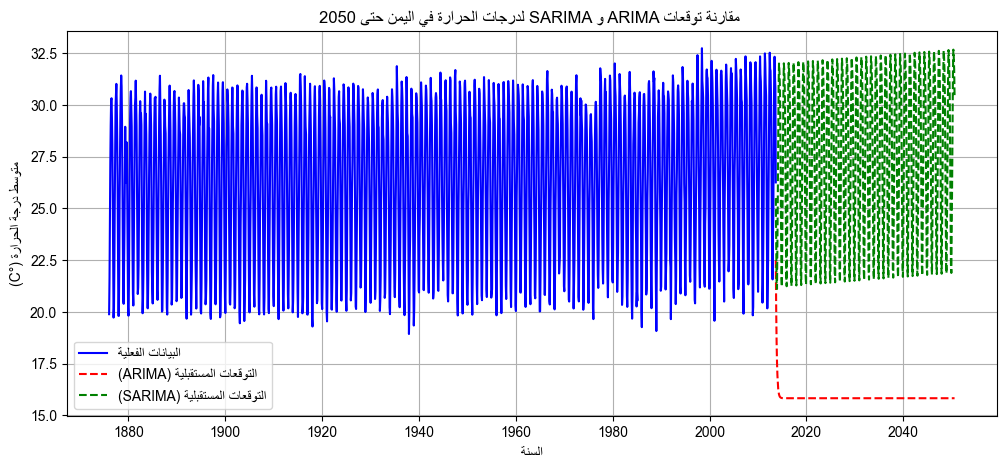

In [41]:
#  تحديد الخط العربي الصحيح
plt.rcParams['font.family'] = 'Arial'

#  تحويل النصوص العربية لإصلاح ترتيب الأحرف
def fix_arabic_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

#  رسم المقارنة بين توقعات ARIMA و SARIMA
plt.figure(figsize=(12, 5))
plt.plot(yemen_ts, label=fix_arabic_text("البيانات الفعلية"), color="blue")
plt.plot(forecast_index, forecast_mean, label=fix_arabic_text("التوقعات المستقبلية (ARIMA)"), color="red", linestyle="dashed")
plt.plot(sarima_forecast_index, sarima_forecast_mean, label=fix_arabic_text("التوقعات المستقبلية (SARIMA)"), color="green", linestyle="dashed")

plt.title(fix_arabic_text(" مقارنة توقعات ARIMA و SARIMA لدرجات الحرارة في اليمن حتى 2050"))
plt.xlabel(fix_arabic_text("السنة"))
plt.ylabel(fix_arabic_text("متوسط درجة الحرارة (°C)"))
plt.legend()
plt.grid(True)
plt.show()
